# Example: REV analysis for porosity

This example shows the functionality of REVAnalyzer library and the structure of output for scalar metric REV
analysis taking porosity as the example. 

In [1]:
from julia.api import Julia
jl = Julia(compiled_modules=False)
#These two lines are necessary in every code which uses REVAnalyzer library, even if this code 
#does not use julia packages. Error is generated if you skip these line in your code.  

In [18]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import Porosity

<img src="fig_subcubes.png" alt="Drawing" style="width: 600px;"/>

To analyze both deterministic and statistical REVs, one should make the proper selection of subcubes from analyzed 3D sample images. We select a set of growing subcubes SC$_k$($i$) from the center and all the corners of the sample, as it is shown in figure. We take subcube linear size $L_i = L_0 + i \Delta L$ with increment step $\Delta L$ and 
$L_0 = \Delta L$.

The reliable sREV analysis is possible only if subcubes do not overlap or their overlap is limited. Therefore, we introduce the $L_{sREV}$ parameter. For  $L \leq L_{sREV}$, we cut from the considered sample all 9 subcubes SC$_k$($i$) with $k$ = 0,1,.,8. For $L > L_{sREV}$, only the center subcubes SC$_0$($i$) are cut.

In [3]:
#initialization.

metric = Porosity() #metric to be analyzed
image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size (\Delta L)
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed (L_{sREV}).
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'
 
analyzer = REVAnalyzer(metric, image, size, cut_step, sREV_max_size, datadir, outputdir)

In [4]:
#list of all considered subcubes linear sizes
analyzer.cut_sizes

[50, 100, 150, 200, 250]

In [5]:
#generate metric data for all the subcubes
analyzer.generate()

In [6]:
#the results of generation are available in the subdirectory which is created in output directory:
analyzer._outputdir_cut_values 

'output/ceramic300/Porosity/cuts_values'

In [7]:
#legend for file names in this subdirectoty: 
#cuti_L_image.txt, where i - index of subcube, L - linear size of subcube.
analyzer._metric_cut_names

['cut0_50_ceramic300.txt',
 'cut1_50_ceramic300.txt',
 'cut2_50_ceramic300.txt',
 'cut3_50_ceramic300.txt',
 'cut4_50_ceramic300.txt',
 'cut5_50_ceramic300.txt',
 'cut6_50_ceramic300.txt',
 'cut7_50_ceramic300.txt',
 'cut8_50_ceramic300.txt',
 'cut0_100_ceramic300.txt',
 'cut1_100_ceramic300.txt',
 'cut2_100_ceramic300.txt',
 'cut3_100_ceramic300.txt',
 'cut4_100_ceramic300.txt',
 'cut5_100_ceramic300.txt',
 'cut6_100_ceramic300.txt',
 'cut7_100_ceramic300.txt',
 'cut8_100_ceramic300.txt',
 'cut0_150_ceramic300.txt',
 'cut1_150_ceramic300.txt',
 'cut2_150_ceramic300.txt',
 'cut3_150_ceramic300.txt',
 'cut4_150_ceramic300.txt',
 'cut5_150_ceramic300.txt',
 'cut6_150_ceramic300.txt',
 'cut7_150_ceramic300.txt',
 'cut8_150_ceramic300.txt',
 'cut0_200_ceramic300.txt',
 'cut1_200_ceramic300.txt',
 'cut2_200_ceramic300.txt',
 'cut3_200_ceramic300.txt',
 'cut4_200_ceramic300.txt',
 'cut5_200_ceramic300.txt',
 'cut6_200_ceramic300.txt',
 'cut7_200_ceramic300.txt',
 'cut8_200_ceramic300.txt',
 

In [8]:
#one can read the metric value from the specific subcube:
cut_size = 150
cut_id = 5
value = analyzer.read(cut_size, cut_id)
print(value)

0.38917985185185183


In [9]:
#calling method read with zero argument gives us the metric value for the uncut analyzed image:  
value = analyzer.read(0)
print(value)

0.3908998888888889


In [10]:
#to get sREV and dREV sizes one should fix correponding thresholds. Then we can analyze the generated data.
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

For the estimation of sREV size for scalar metric S, we first calculate its values $S_{ik}$ for the subcubes SC$_k$($i$), and then obtain mean value $\bar{S_i}$, standard deviation $\sigma_i$ and, finally, use the following formula:

$m: \forall i \ge m$, $\sigma_{norm}(i) = \sigma_i/ \bar{S_i} < \varepsilon_{sREV}$ (sREV_size_1), 

where $\varepsilon_{sREV}$ is sREV threshold.

For the estimation of dREV size we use two different formulas:

$m: \forall i \ge m$, $\delta_1(i) = |2(\bar{S_i} - \bar{S}_{i+1})/(\bar{S_i} + \bar{S}_{i+1})| < \varepsilon_{dREV}$ (dREV_size_1),

and

$m: \forall i \ge m$, $\delta_2(i) = |2(\bar{S_i} - S)/(\bar{S_i} + S)| < \varepsilon_{dREV}$ (dREV_size_2),

where $S$ is the metirc value for the uncut analyzed image and $\varepsilon_{dREV}$ is dREV threshold. 

In [11]:
#mean metric values are presented as dictionary with keys equal to subcube linear sizes and values equal to metric
#mean values
analyzer.metric_mean

{300: 0.3908998888888889,
 50: 0.40074666666666664,
 100: 0.389232,
 150: 0.3915640164609054,
 200: 0.3935402361111111,
 250: 0.383722816}

In [12]:
#standard veviations of metric values are presented as dictionary with keys equal to subcube linear sizes and 
#values equal to metric std values
analyzer.metric_std

{50: 0.04960495946531511,
 100: 0.01601985914766766,
 150: 0.0067188997627574305,
 200: 0.004383275151485081}

In [13]:
#normed standard veviations of metric values are presented as dictionary with keys equal to subcube linear sizes and 
#values equal to metric normed std values (\sigma_{norm} in Eq. (sREV_size_1))
analyzer.metric_normed_std

{50: 0.1237813401616527,
 100: 0.041157610750574614,
 150: 0.01715913485484502,
 200: 0.011138060989137383}

In [14]:
analyzer.sREV_size_1

50

In [15]:
analyzer.dREV_size_1

50

In [16]:
analyzer.dREV_size_2

50

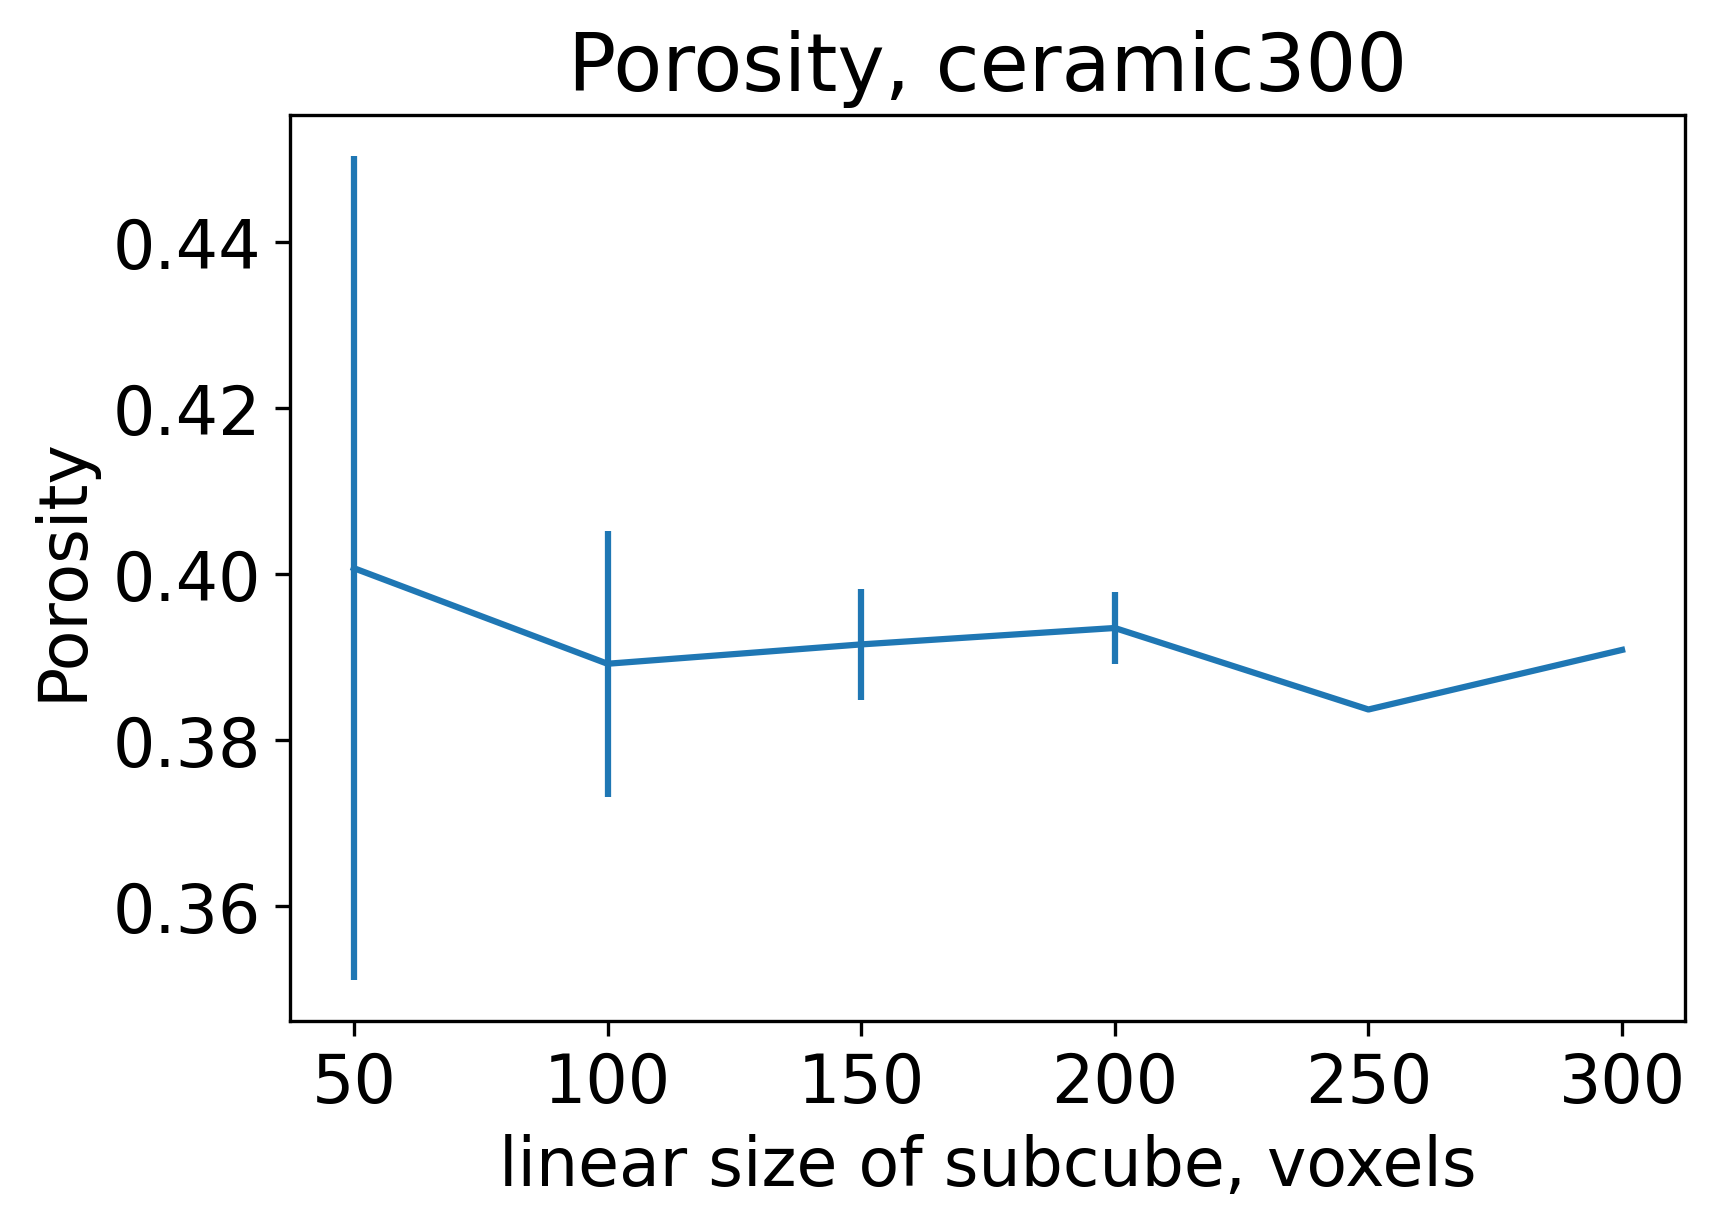

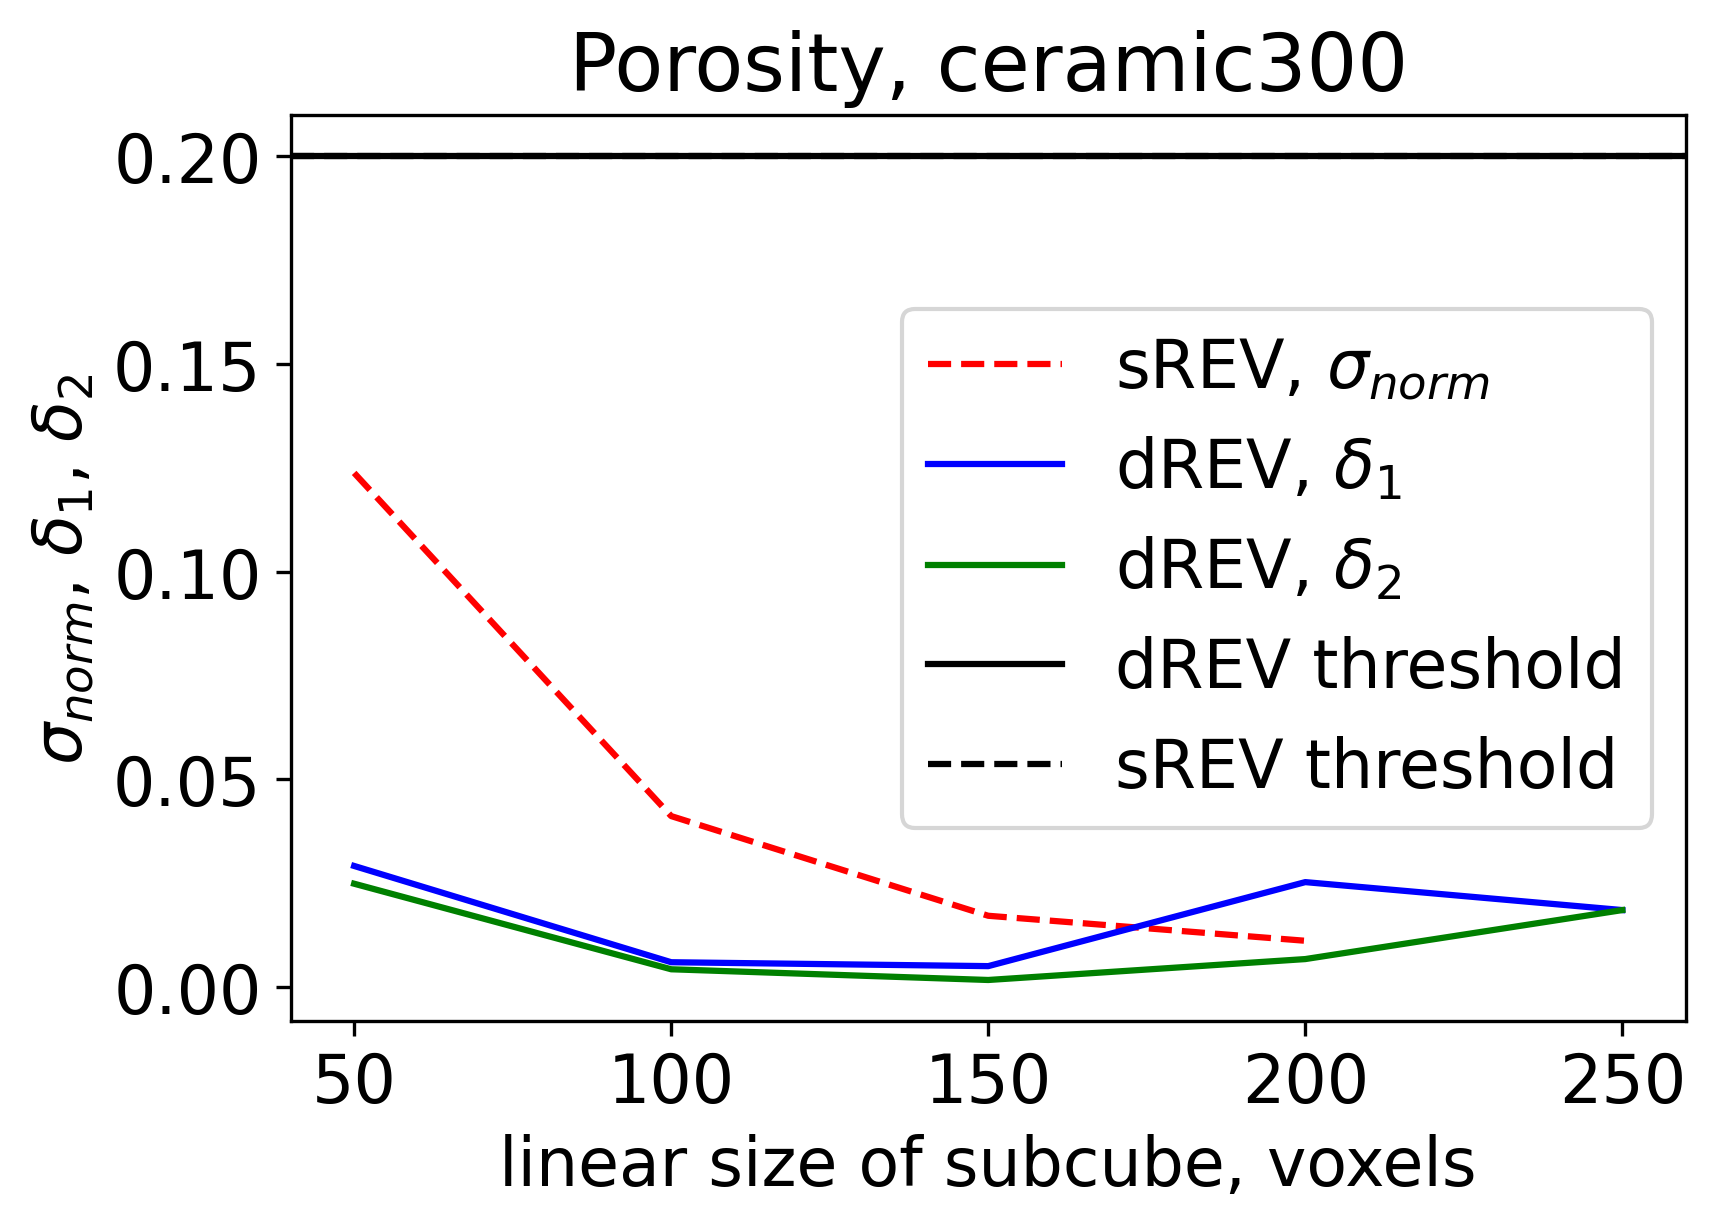

In [17]:
#the results of REV analysis can be visualized. The first figure presents mean and std metric values (as errorbars)
#as the function of subcube linear size. The second one - the dependeces of \delta_1, \delta_2 and \sigma_{norm}
#calculated as in Eqs. above. One can visually estimate dREV and sREV sizes from this figure, as well.
#These figures are saved as .png in the subdirectory analyzer.outputdir/figs/ .
analyzer.show_results()